In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [88]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [89]:
df=df.drop(columns=["area_type","availability","location"],axis=1)

In [90]:
df=df.dropna()

In [91]:
df["BHK"]=df["size"].apply(lambda x:int(x.split(" ")[0]))

In [92]:
df

,size,society,total_sqft,bath,balcony,price,BHK
0,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...
13313,3 BHK,Aklia R,1345,2.0,1.0,57.00,3
13314,3 BHK,SoosePr,1715,3.0,3.0,112.00,3
13315,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5
13317,2 BHK,Mahla T,1141,2.0,1.0,60.00,2


In [93]:
def convert(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1])/2)
    try:
        return float(x)
    except (TypeError,ValueError):
        return None

In [94]:
def fl(x):
    try:
        float(x)
        return True
    except (ValueError,TypeError):
        return False
   
    

In [95]:
df[~df["total_sqft"].apply(fl)].head()

,size,society,total_sqft,bath,balcony,price,BHK
30,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 30 to 13299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        159 non-null    object 
 1   society     159 non-null    object 
 2   total_sqft  159 non-null    object 
 3   bath        159 non-null    float64
 4   balcony     159 non-null    float64
 5   price       159 non-null    float64
 6   BHK         159 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 14.0+ KB


In [97]:
df2=df.copy()

In [142]:
df2["total_sqft"]=df["total_sqft"].apply(convert)

In [99]:
df2

,size,society,total_sqft,bath,balcony,price,BHK
0,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...
13313,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,3
13314,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3
13315,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5
13317,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2


In [100]:
df2.iloc[30]

size            3 BHK
society       Suent V
total_sqft     2010.0
bath              3.0
balcony           2.0
price            91.0
BHK                 3
Name: 52, dtype: object

In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7497 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        7497 non-null   object 
 1   society     7497 non-null   object 
 2   total_sqft  7482 non-null   float64
 3   bath        7497 non-null   float64
 4   balcony     7497 non-null   float64
 5   price       7497 non-null   float64
 6   BHK         7497 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 468.6+ KB


In [129]:
df3=df1[df1["total_sqft"]/df["BHK"]>300]

C:\Users\RAJ\AppData\Local\Temp\ipykernel_21344\2659307033.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df1[df1["total_sqft"]/df["BHK"]>300]


In [130]:
df3

,size,society,total_sqft,bath,balcony,price,BHK
30,4 BHK,LedorSa,3525.0,4.0,0.0,186.000,4
122,4 BHK,SNontle,7145.0,4.0,0.0,477.000,4
137,2 BHK,Vaarech,1594.5,2.0,0.0,54.005,2
165,2 BHK,Kinuerg,1815.0,2.0,0.0,43.490,2
188,2 BHK,MCvarar,1785.0,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,2 BHK,Bhath N,1380.0,2.0,0.0,38.190,2
12990,3 BHK,Sodgere,2940.5,3.0,0.0,122.000,3
13059,2 BHK,Shodsir,1935.0,2.0,0.0,72.760,2
13265,2 BHK,Ranuetz,1825.0,2.0,0.0,59.135,2


In [148]:
df2["price_per_sqft"]=(df2["price"]*100000)/df2["total_sqft"]

In [149]:
df2

,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605
...,...,...,...,...,...,...,...,...
13313,3 BHK,Aklia R,1345.0,2.0,1.0,57.00,3,4237.918216
13314,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3,6530.612245
13315,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5,6689.834926
13317,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2,5258.545136


<Axes: ylabel='total_sqft'>

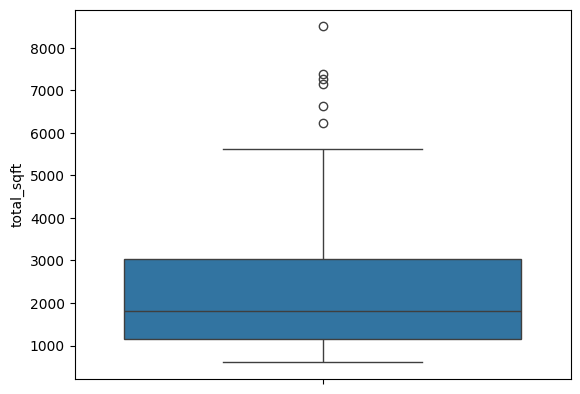

In [131]:
sns.boxplot(df3["total_sqft"])

In [132]:
q1=np.quantile(df3["total_sqft"],0.25)
q3=np.quantile(df3["total_sqft"],0.75)
IQR=q3-q1
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)

In [133]:
lb

-1674.625

In [134]:
ub

5852.375

In [137]:
df3=df3[df3["total_sqft"]<ub]

In [138]:
df3=df3[df3["total_sqft"]>lb]

In [139]:
df3

,size,society,total_sqft,bath,balcony,price,BHK
30,4 BHK,LedorSa,3525.0,4.0,0.0,186.000,4
137,2 BHK,Vaarech,1594.5,2.0,0.0,54.005,2
165,2 BHK,Kinuerg,1815.0,2.0,0.0,43.490,2
188,2 BHK,MCvarar,1785.0,2.0,0.0,56.800,2
549,2 BHK,Shxorm,1915.0,2.0,0.0,63.770,2
...,...,...,...,...,...,...,...
12975,2 BHK,Bhath N,1380.0,2.0,0.0,38.190,2
12990,3 BHK,Sodgere,2940.5,3.0,0.0,122.000,3
13059,2 BHK,Shodsir,1935.0,2.0,0.0,72.760,2
13265,2 BHK,Ranuetz,1825.0,2.0,0.0,59.135,2


<Axes: ylabel='total_sqft'>

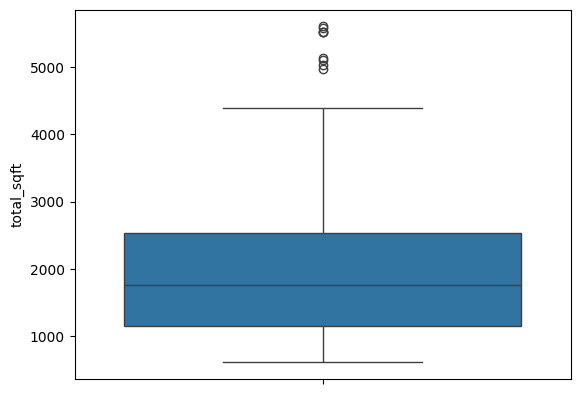

In [140]:
sns.boxplot(df3["total_sqft"])